In [33]:
#import libraries yg dibutuhkan
import pandas as pd #memanggil pandas sebagai pd
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns
from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler  #mamanggil minmaxscaler dari sklearn processing
from sklearn.metrics import r2_score #memanggil r2_score dari sklearn.metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder #memanggil model encode onehotencoder dari sklearn processing
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error #memanggil MEA, MSE dari sklearn.matrics
import pickle  #memanggil pickle
import json #memanggil json
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.utils import shuffle #memanggil shuffle dari sklearn.utils
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.linear_model import LogisticRegression #Memanggil LogisticRegression dari sklearn.linear_model
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors
from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm


In [19]:
df = pd.read_csv('./datasets/clean_data_fix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   1310 non-null   int64  
 1   Unnamed: 0     1310 non-null   int64  
 2   Judul          1310 non-null   object 
 3   Harga          1310 non-null   float64
 4   Lokasi         1310 non-null   object 
 5   Hyperlink      1310 non-null   object 
 6   Img_Hyperlink  1310 non-null   object 
 7   Kamar Tidur    1310 non-null   float64
 8   Kamar Mandi    1310 non-null   float64
 9   Luas Tanah     1310 non-null   int64  
 10  Luas Bangunan  1310 non-null   int64  
 11  Sertifikat     1310 non-null   object 
 12  Daya Listrik   1310 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.2+ KB


In [42]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique
0,Judul,1310
1,Lokasi,30
2,Hyperlink,1308
3,Img_Hyperlink,1308
4,Sertifikat,3


In [43]:
#drop column high cardinality
df.drop(['Judul','Hyperlink','Img_Hyperlink'], axis=1, inplace=True)

In [20]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,Unnamed: 0.1,1310
1,Unnamed: 0,1310
2,Harga,244
3,Kamar Tidur,16
4,Kamar Mandi,14
5,Luas Tanah,263
6,Luas Bangunan,208
7,Daya Listrik,21


In [44]:
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)

## Split 

In [45]:
X = df.drop(['Harga'], axis = 1)
y = df['Harga']
X

,Unnamed: 0,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
0,0,"Balikpapan Selatan, Balikpapan",5.0,3.0,144,207,SHM - Sertifikat Hak Milik,4400
1,1,"Balikpapan Utara, Balikpapan",3.0,2.0,534,200,SHM - Sertifikat Hak Milik,2200
2,2,"Balikpapan Utara, Balikpapan",2.0,2.0,80,140,SHM - Sertifikat Hak Milik,1300
3,3,"Balikpapan Tengah, Balikpapan",3.0,2.0,201,150,SHM - Sertifikat Hak Milik,1300
4,4,"Balikpapan Utara, Balikpapan",3.0,3.0,120,65,SHM - Sertifikat Hak Milik,2200
...,...,...,...,...,...,...,...,...
1305,1385,"Balikpapan Utara, Balikpapan",3.0,2.0,88,105,SHM - Sertifikat Hak Milik,2200
1306,1386,"Balikpapan Utara, Balikpapan",4.0,3.0,200,172,SHM - Sertifikat Hak Milik,2200
1307,1429,"Balikpapan Utara, Balikpapan",3.0,2.0,200,200,SHM - Sertifikat Hak Milik,2200
1308,1442,"Balikpapan Baru, Balikpapan",4.0,2.0,520,380,SHM - Sertifikat Hak Milik,6600


## Splitting between Train-Set and Test-set

In [46]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('x Train Size: ', X_train.shape)
print('x Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Test Size: ', y_test.shape)

x Train Size:  (1048, 8)
x Test Size:  (262, 8)
y Train Size:  (1048,)
y Test Size:  (262,)


In [47]:
num_cols = (X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,Unnamed: 0,0.029854
1,Kamar Tidur,4.140968
2,Kamar Mandi,2.905161
3,Luas Tanah,9.084327
4,Luas Bangunan,2.940358
5,Daya Listrik,3.627571


In [48]:
# First, capping the normal distribution

winsoriser_age = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['Kamar Tidur','Kamar Mandi','Luas Tanah','Luas Bangunan','Daya Listrik'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

In [49]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Unnamed: 0 - Before Capping


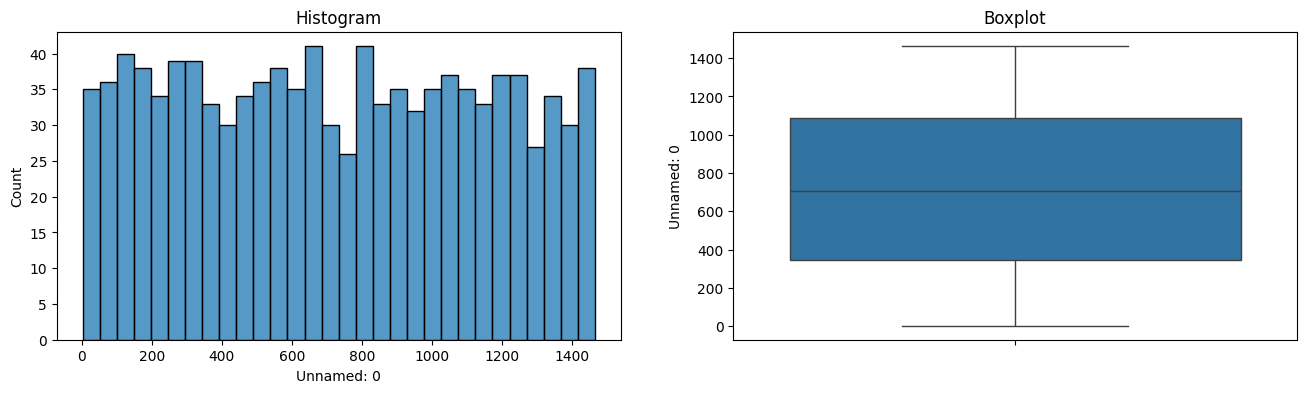


Unnamed: 0 - After Capping


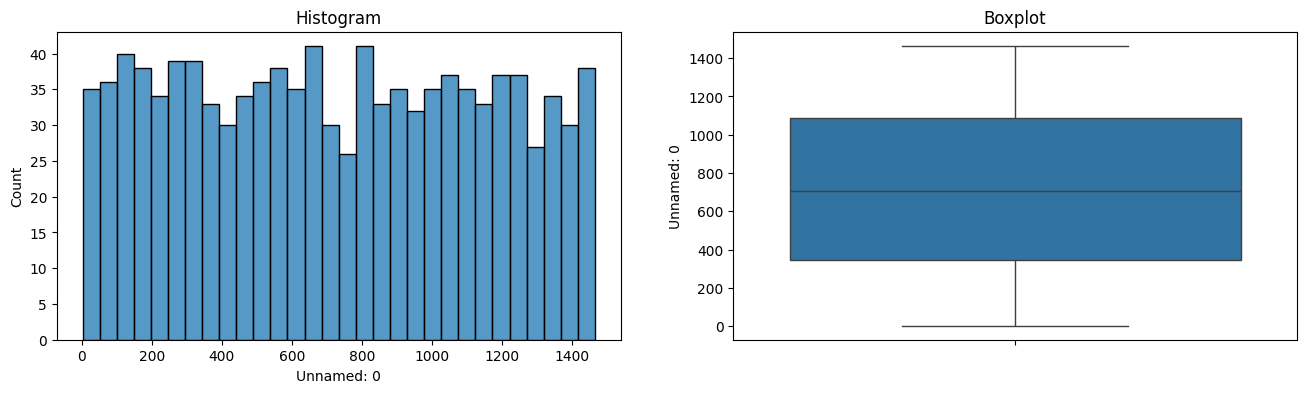

Kamar Tidur - Before Capping


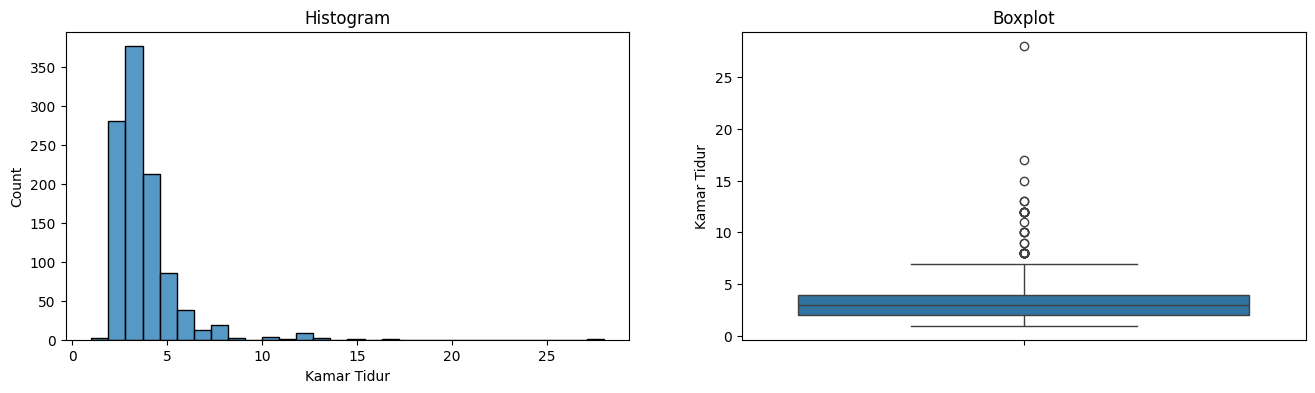


Kamar Tidur - After Capping


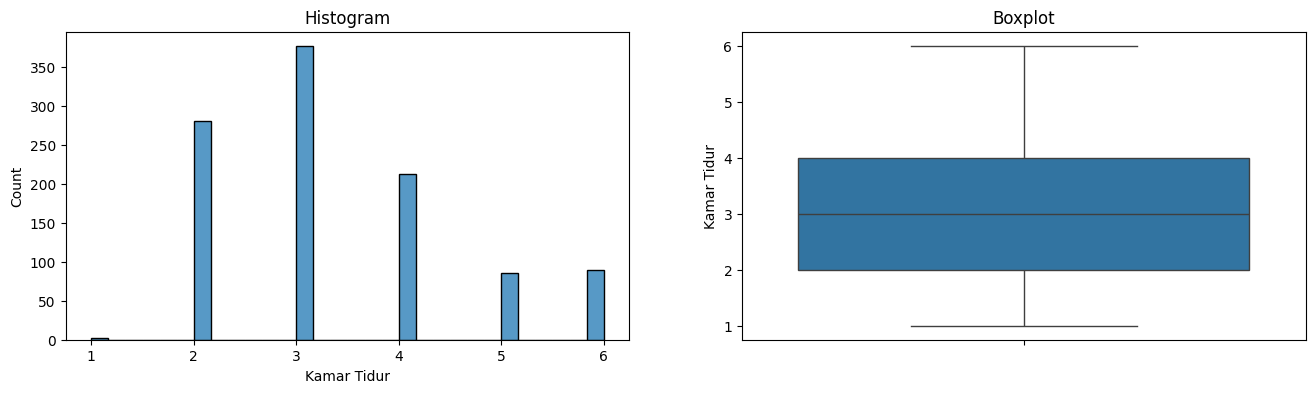

Kamar Mandi - Before Capping


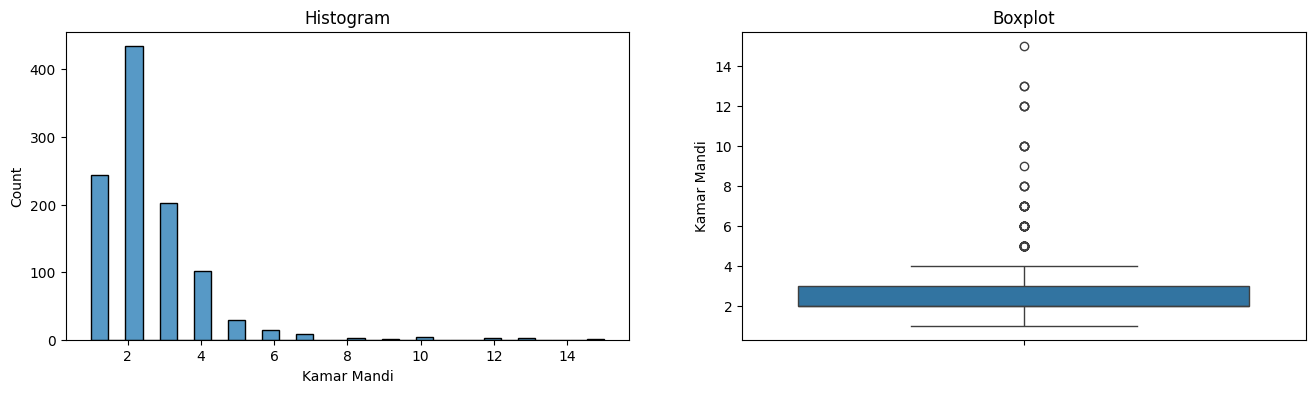


Kamar Mandi - After Capping


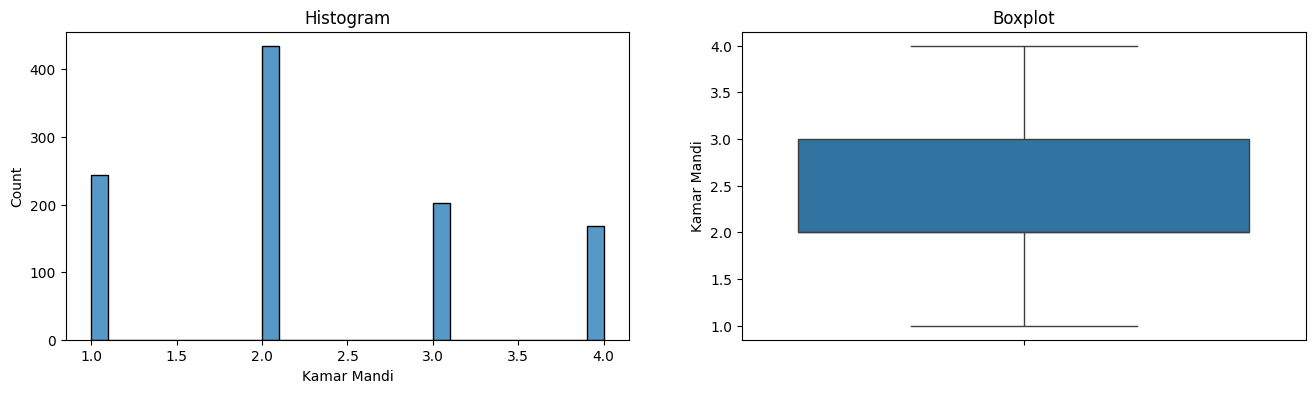

Luas Tanah - Before Capping


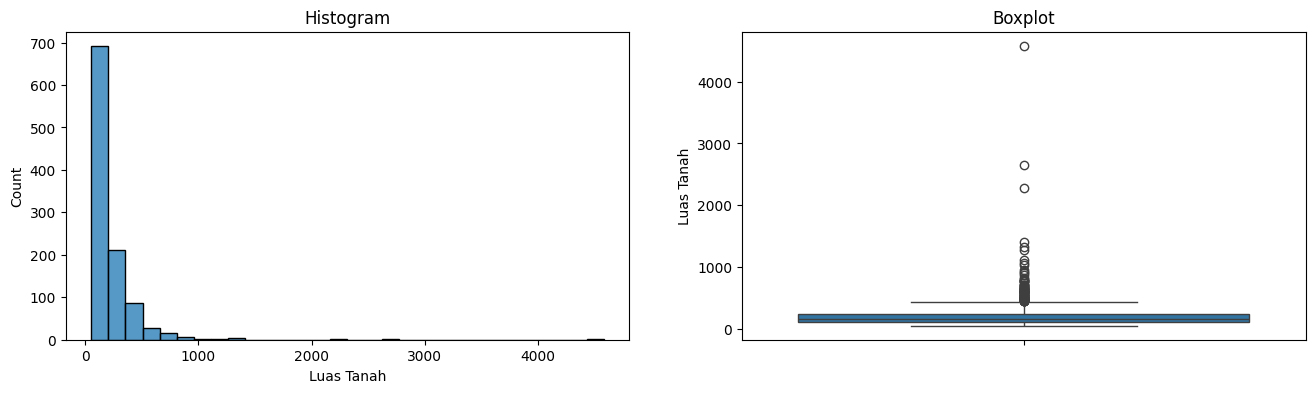


Luas Tanah - After Capping


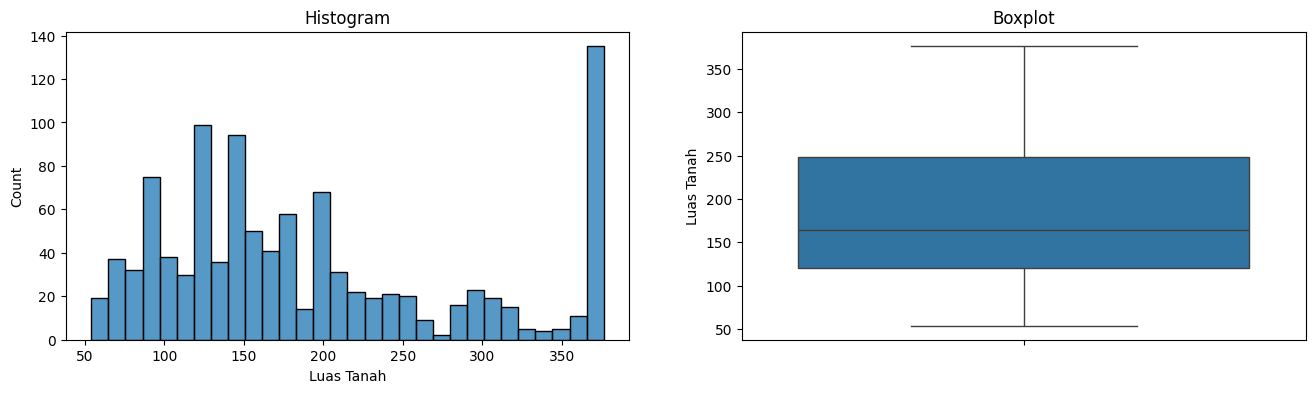

Luas Bangunan - Before Capping


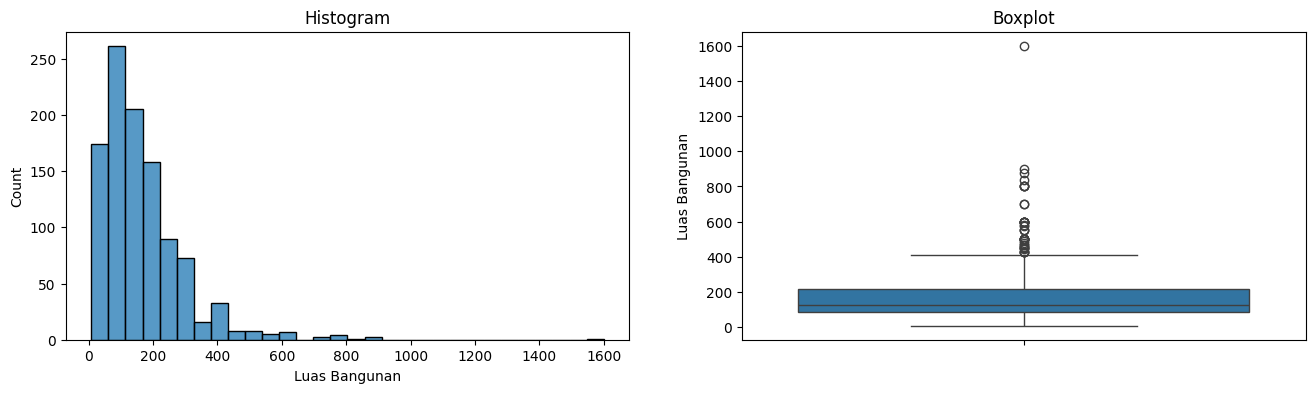


Luas Bangunan - After Capping


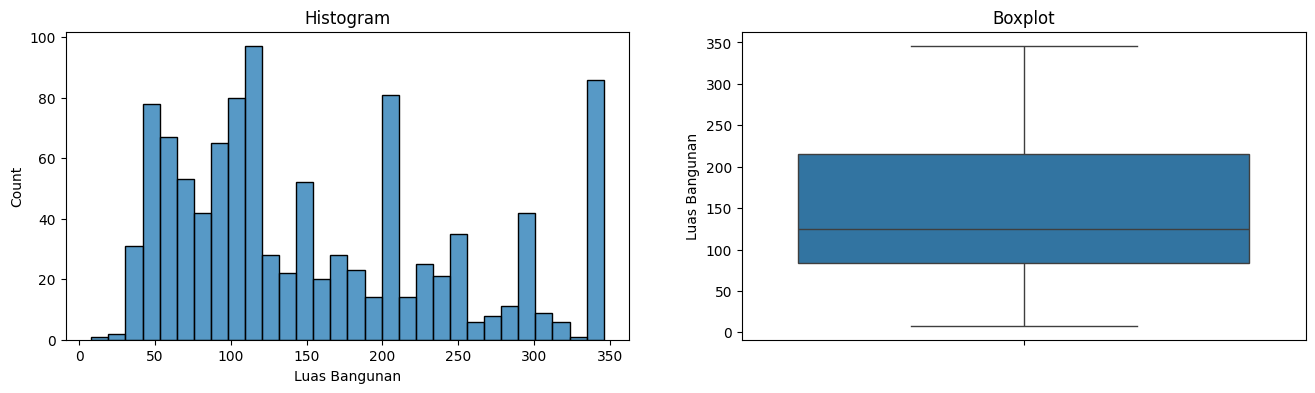

Daya Listrik - Before Capping


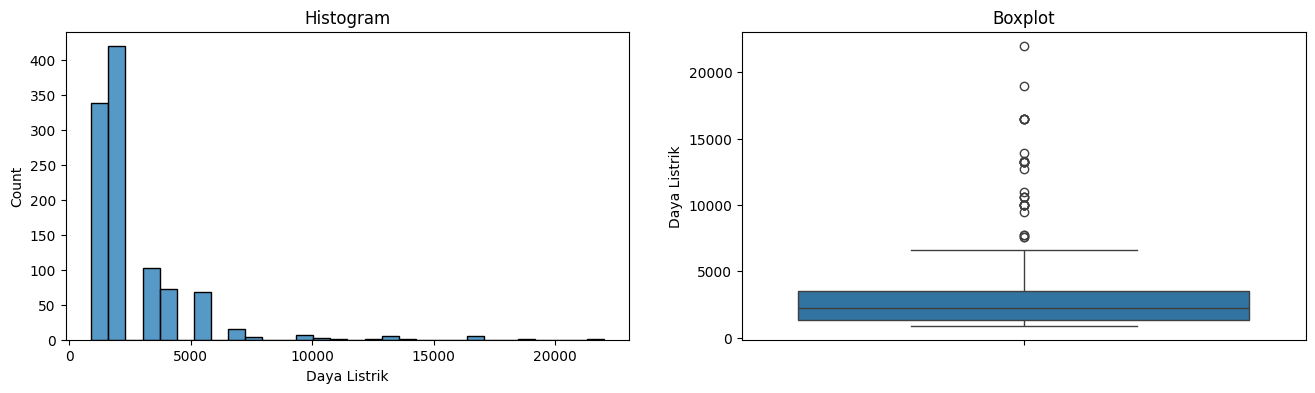


Daya Listrik - After Capping


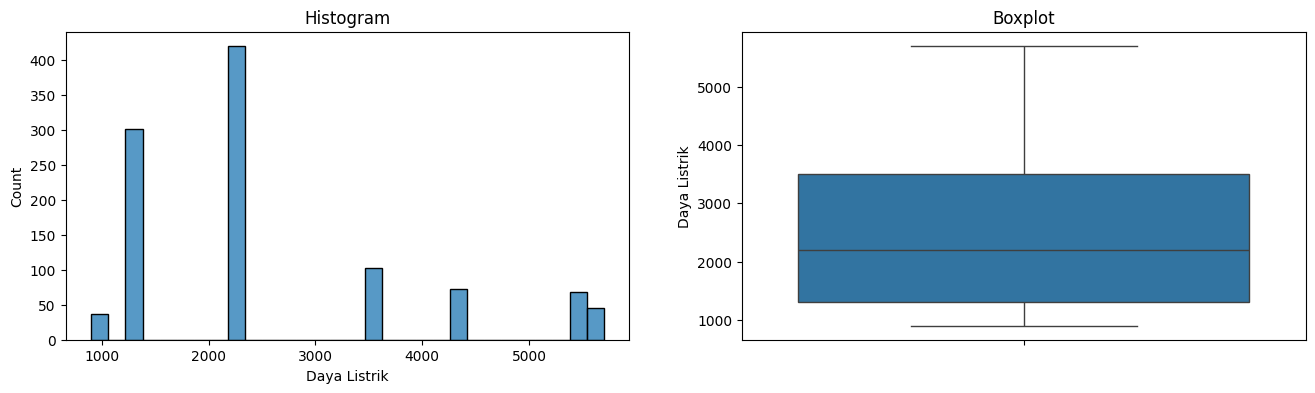

In [50]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

In [54]:
X_test.isnull().sum()

Unnamed: 0       0
Lokasi           0
Kamar Tidur      0
Kamar Mandi      0
Luas Tanah       0
Luas Bangunan    0
Sertifikat       0
Daya Listrik     0
dtype: int64

In [55]:
y_train.isnull().sum()

0

In [56]:
X_train

,Unnamed: 0,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
449,510,"Balikpapan Selatan, Balikpapan",2.0,1.0,144,72,SHM - Sertifikat Hak Milik,1300
895,1078,"Sumber Rejo, Balikpapan",3.0,1.0,78,42,SHM - Sertifikat Hak Milik,1300
411,466,"Balikpapan Baru, Balikpapan",3.0,1.0,120,93,SHM - Sertifikat Hak Milik,5500
995,1201,"Balikpapan Kota, Balikpapan",6.0,4.0,150,174,SHM - Sertifikat Hak Milik,3500
1014,1224,"Balikpapan Baru, Balikpapan",4.0,2.0,230,200,SHM - Sertifikat Hak Milik,2200
...,...,...,...,...,...,...,...,...
1292,1278,"Damai, Balikpapan",5.0,5.0,280,226,SHM - Sertifikat Hak Milik,4400
1016,1228,"Balikpapan Baru, Balikpapan",3.0,3.0,198,198,SHM - Sertifikat Hak Milik,3500
165,179,"Balikpapan Selatan, Balikpapan",3.0,2.0,165,250,SHM - Sertifikat Hak Milik,2200
7,7,"Balikpapan Utara, Balikpapan",6.0,4.0,396,400,SHM - Sertifikat Hak Milik,4400


### Split Between Num col and Cat col

In [57]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Unnamed: 0', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Daya Listrik']
Categorical Columns:  ['Lokasi', 'Sertifikat']


In [58]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Unnamed: 0,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik
449,510,2.0,1.0,144,72,1300
895,1078,3.0,1.0,78,42,1300
411,466,3.0,1.0,120,93,5500
995,1201,6.0,4.0,150,174,3500
1014,1224,4.0,2.0,230,200,2200
...,...,...,...,...,...,...
1292,1278,5.0,5.0,280,226,4400
1016,1228,3.0,3.0,198,198,3500
165,179,3.0,2.0,165,250,2200
7,7,6.0,4.0,396,400,4400


In [59]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Unnamed: 0,ada korelasi
1,Kamar Tidur,ada korelasi
2,Kamar Mandi,ada korelasi
3,Luas Tanah,ada korelasi
4,Luas Bangunan,ada korelasi
5,Daya Listrik,ada korelasi


In [60]:
# Feature selection Kategorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Lokasi,ada korelasi
1,Sertifikat,ada korelasi


## Model Definition

In [ ]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', StandardScaler(), selector(dtype_exclude='object'))
])

#Making pipeline for LogReg
pipe_logreg = Pipeline([
('transformer', transformer),
('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs'))
])

#making pipeline for SVM
pipe_svm = Pipeline([
('transformer', transformer),
('classifier', SVC(kernel='rbf', gamma=0.1))
])

#making pipeline for KNN
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])